# HW 4
___

In [151]:
import numpy as np
import matplotlib.pyplot as plt

### Polynomials
A polynomial $P(x)$ can be represented by an array of coefficients in *increasing* degree order. Examples are shown in this table:

| &nbsp; &nbsp; &nbsp; Polynomial &nbsp; &nbsp; &nbsp;|Coefficients|  
|:---------:|:--:|
|$8 - 6x + x^2$|`array([8, -6, 1])`|
|$8 + x^2$|`array([8, 0, 1])`|
|$- 6x + x^2$|`array([0, -6, 1])`|
|$8$|`array([8])`|


**Use the `Polynomial` class defined below** for the following problems. 

**Add the following methods**:
* **`__call__(x)`** evaluates the polynomial $P$ for a given value of $x$. It allows the use of the `P(x)` syntax. (You may use Horner's Method but it's not necessary.)
* **`deriv()`** returns the derivative of $P(x)$ as a `Polynomial` with degree one less than $P$.

For example,
```
poly = Polynomial([8, -6, 1])
poly(-1)
```
returns `15` and
```
vars(poly.deriv())
```
returns `{'coeffs': array([-6,  2]), 'degree': 1}`.

(*Optional:* You may add other methods to this class.)



In [152]:
c = np.array([8, -6, 1, 4, -2,7])
d_c = np.array([c[i]*i for i in range(1,len(c))])
d_c

array([-6,  2, 12, -8, 35])

In [153]:
class Polynomial:
    def __init__(self, coeffs):
        self.coeffs = np.array(coeffs)
        self.degree = self.coeffs.size - 1
    
    def __call__(self,x):
        pows_x = np.array([x**i for i in range(len(self.coeffs))])
        return sum(self.coeffs * pows_x)
    
    def deriv(self):
        d_coeffs = np.array([self.coeffs[i]*i for i in range(1,len(self.coeffs))])
        return Polynomial(d_coeffs)

In [154]:
poly = Polynomial([8, -6, 1])
vars(poly.deriv())


{'coeffs': array([-6,  2]), 'degree': 1}

### Newton's Method for Polynomials

Newton's Method is an iterative algorithm for finding a root of a differentiable function $f(x)$. Given an initial guess of $x_0$, the method converges to a solution by repeatedly applying this formula: 

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$

When Newton's Method converges, it usually does so quickly, however it does not always converge, for example, when $f'(x_n) = 0$.

Write an iterative function **`newton(poly, x0, tol=1e-4, max_iter=50)`** that uses Newton's Method to find a root of a `Polynomial` $P(x)$ given an initial guess `x0`. The method terminates when $\lvert P(x_n)\rvert$ is less than the tolerance `tol`. If the method has not converged after `max_iter` iterations, the function returns `None`.

In [155]:
def newton(poly, x0, tol=1e-4, max_iter=50):
    x = x0
    it = 0
    while it<=max_iter:
        p_x = poly(x)
        if np.abs(p_x) < tol:
            return np.around(x,6)
        else:
            dp = poly.deriv()
            dp_x = dp(x)
            x = x - (p_x/dp_x)
        it += 1
    
    return None

In [156]:
poly1 = Polynomial([8, -6, 1])

In [157]:
newton(poly1, 1, tol=1e-4, max_iter=50)

2.0

### Recursive Newton's Method
**Write a recursive version** of the previous function called **`newton_rec()`**.

In [158]:
def newton_rec(poly, x0, tol=1e-4, max_iter=50):
    if max_iter == 0:
        return None
    x = x0
    p_x = poly(x)
    if np.abs(p_x) < tol:
        return np.around(x,6)
    else:
        dp = poly.deriv()
        dp_x = dp(x)
        x = x - (p_x/dp_x)
        return newton_rec(poly, x, tol, max_iter-1)

In [159]:
poly2 = Polynomial([2,-10,1,4])

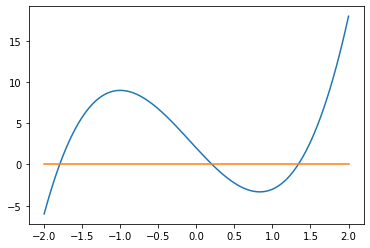

In [160]:
# poly2
xvals = np.linspace(-2,2,100)
yvals = [poly2(x) for x in xvals]
zeros = [0 for _ in xvals]
plt.plot(xvals, yvals)
plt.plot(xvals, zeros)
plt.show()

In [161]:
newton_rec(poly2, 1, 1e-4, 50)

1.338591

### Bisection Method for Polynomials
The *bisection method* is an alternate way to find a root of a `Polynomial`. Write a function **`bisection(poly, interval, tol=1e4, max_iter=50)`** that uses **binary search** to find a root of $P(x)$. Begin with a closed interval $[a, b]$ represented by a 2-element tuple `(a, b)`. If $P(a)$ and $P(b)$ are opposite signs, then a root is guaranteed to exist in interval $[a, b]$ because $P(x)$ is continuous. 

The method repeats these steps until a root is found (within the tolerance) or `max_iter` is reached:
* Calculate the midpoint of the interval. If it corresponds to a root, return the root.
* If the midpoint is not a root, repeat the process using either the left half or the right half of the interval.

The function returns `None` if $P(a)$ and $P(b)$ are not opposite signs.

(*Hint:* You may wish to use `np.sign(val)` which returns 1, 0, or -1, depending on whether `val` is positive, zero, or negative, respectively.)

In [162]:
def bisection(poly, interval, tol=1e-4, max_iter=50):
    if max_iter == 0:
        return None
    
    a,b = interval
    p_a = poly(a)
    p_b = poly(b)
    if np.abs(p_a) < tol:
        return np.around(a,6)
    elif np.abs(p_b) < tol:
        return np.around(b,6)
    if np.sign(p_a) == np.sign(p_b):
        return None
    
    mid = (a+b)/2
    p_mid = poly(mid)
    if np.abs(p_mid) < tol:
        return np.around(mid,6)
    
    if np.sign(p_a) == np.sign(p_mid):
        return bisection(poly, (mid,b), tol, max_iter-1)
    else:
        return bisection(poly, (a,mid), tol, max_iter-1)

In [163]:
poly1 = Polynomial([8, -6, 1])

In [164]:
bisection(poly1, (1.5,3), 1e-4, 50)

1.999969

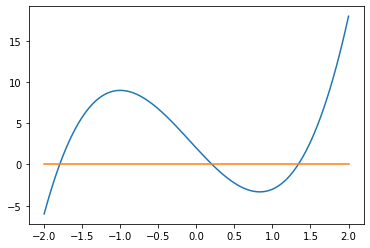

In [165]:
# poly2
xvals = np.linspace(-2,2,100)
yvals = [poly2(x) for x in xvals]
zeros = [0 for _ in xvals]
plt.plot(xvals, yvals)
plt.plot(xvals, zeros)
plt.show()

In [166]:
poly2 = Polynomial([2,-10,1,4])

In [167]:
bisection(poly2, (0,1), 1e-4, 50)

0.207916

In [168]:
# function does not work to find the roots when the value of f at both sides of the interval are the same sign, even 
# if there are roots within the interval
bisection(poly2, (-1,2), 1e-4, 50)

### Another Bisection Problem : Function Inverse.
Suppose `func(x)` is a monotonically increasing, continuous function and `fval = func(x)`. Given a value `fval`, we wish to find the corresponding x value.
Write a **recursive** function `inverse(func, fval, interval, tol=1e-4)` that uses **binary search** to find a value `x` in `interval (a, b)` such that `func(x) ≈ fval`, within a given tolerance `tol`. If there is no such `x`, return `None`.
Example:
```
func = lambda x: x**3
inverse(func, -27, (-10, 10))
```
returns -3.000002 because (−3)3 = −27. The value −3.000002 lies in the interval (−10, 10)
and is within 10−4 of −3.

In [170]:
def inverse(func, fval, interval, tol=1e-4):
    a,b = interval
    
    if (fval < func(a)) or (fval > func(b)):
        return None
    
    if abs(func(a)-fval) < tol:
        return a
    elif abs(func(b)-fval) < tol:
        return b
    
    mid = (a+b)/2
    if abs(func(mid) - fval) < tol:
        return mid
    elif func(mid) > fval:
        return inverse(func, fval, (a,mid), tol=1e-4)
    else:
        return inverse(func, fval, (mid,b), tol=1e-4)

In [171]:
func = lambda x: x**3
inverse(func, -27, (-10, 10))

-3.000001907348633